# Симетричне матрице

Садржај:
- [Алгебра симетричних матрица](#Алгебра-симетричних-матрица)
- [Спектралне карактеристике симетричних матрица](#Spektralne-karakteristike-simetričnih-matrica)
- [Позитивна дефинитност матрица](#Pozitivna-definitnost-matrica)
- [Уопштени скаларни производ](#Uopšteni-skalarni-proizvod)
- [Метод коњугованих градијената](#Metod-konjugovanih-gradijenata)

In [1]:
import numpy as np
import numpy.random as rndm
import matplotlib as mplb
import matplotlib.pyplot as plt
import scipy.linalg as spl
from timeit import default_timer as timer

|Излаз/дејство|Функција|
|:---|:---|
|Сопствене вредности и вектори симетричне матрице|`numpy.linalg.eigh`|
|Сопствене вредности симетричне матрице|`numpy.linalg.eigvalsh`|
|Члан-по-члан тест `NaN` вредности|`numpy.isnan`|
|Индекси елемената низа који задовољавају изабрани критеријум |`numpy.argwhere`|

***

## Алгебра симетричних матрица

**Дефиниција 1.** 	Када за матрицу $A$ важи $A^T=A,$ тада је $A$ *симетрична матрица* (symmetric matrix). 
		
Уколико је $A=-A^T,$ за матрицу $A$ кажемо да је косо-симетрична (skew-symmetric).

За комплексне матрице аналогни услов гласи
$$A^H=A.$$
Такве матрице зовемо *ермитске* (Hermitian matrix). Матрице су косо-ермитске (skew-Hermitian) у случају
$$A^H=-A.$$

**Пример 1.** Матрица $A=\begin{bmatrix} 1&2&1\\2&5&-1\\1&-1&0\end{bmatrix}$ је симетрична.	

In [2]:
A=np.array([[1,2,1],[2,5,-1],[1,-1,0]])
A-A.T

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

Матрица $B=\begin{bmatrix}0&1&2\\-1&0&-3\\-2&3&0\end{bmatrix}$ је косо-симетрична. Приметимо да косо-симетричне матрице увек имају нуле на главној дијагонали.

In [3]:
B=np.array([[0,1,2],[-1,0,-3],[-2,3,0]])
B+B.T

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

Матрица $C=\begin{bmatrix} 1&2&1\\2&i&-1\\1&-1&0\end{bmatrix}$ је симетрична, али није ермитска.

In [4]:
C=np.array([[1,2,1],[2,1j,-1],[1,-1,0]])
C-C.T

array([[0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j]])

In [5]:
C-np.conj(C.T)

array([[0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+2.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j]])

Матрица $M=\begin{bmatrix}-1&1+i&2\\1-i&0&-3-2i\\2&-3+2i&1\end{bmatrix}$ је ермитска.

In [6]:
M=np.array([[-1,1+1j,2],[1-1j,0,-3-2j],[2,-3+2j,1]])
M-np.conj(M.T)

array([[0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j]])

In [7]:
M-M.T

array([[0.+0.j, 0.+2.j, 0.+0.j],
       [0.-2.j, 0.+0.j, 0.-4.j],
       [0.+0.j, 0.+4.j, 0.+0.j]])

***

**Задатак 1.** Дописати недостајуће елементе матрица $A,B$ и $C$ тако да је матрица $A$ симетрична, $B$ косо-симетрична и $C$ ермитска.
	$$A=\begin{bmatrix} 5&3&-1\\&0&\\&2&1\end{bmatrix},\qquad
	B=\begin{bmatrix} &&1\\-1&&\\&1&\end{bmatrix},\qquad
	C=\begin{bmatrix}1&22-i&2+i\\&2&\\&-1+2i&3\end{bmatrix}.$$

**Решење :**

\begin{align}
A=\begin{bmatrix} 5&3&-1\\3&0&2\\-1&2&1\end{bmatrix},\qquad
	B=\begin{bmatrix} 0&1&1\\-1&0&-1\\-1&1&0\end{bmatrix},\qquad
	C=\begin{bmatrix}1&22-i&2+i\\22+i&2&-1-2i\\2-i&-1+2i&3\end{bmatrix}.
\end{align}

In [8]:
A=np.array([[5,3,-1],[np.NaN,0,np.NaN],[np.NaN,2,1]])
A

array([[ 5.,  3., -1.],
       [nan,  0., nan],
       [nan,  2.,  1.]])

In [9]:
A.T

array([[ 5., nan, nan],
       [ 3.,  0.,  2.],
       [-1., nan,  1.]])

In [10]:
ind_nan=np.argwhere(np.isnan(A))
A[ind_nan[:,0],ind_nan[:,1]]=A.T[ind_nan[:,0],ind_nan[:,1]]
A

array([[ 5.,  3., -1.],
       [ 3.,  0.,  2.],
       [-1.,  2.,  1.]])

In [11]:
B=np.array([[np.NaN,np.NaN,1],[-1,np.NaN,np.NaN],[np.NaN,1,np.NaN]])
np.fill_diagonal(B,0)
B

array([[ 0., nan,  1.],
       [-1.,  0., nan],
       [nan,  1.,  0.]])

In [12]:
ind_nan=np.argwhere(np.isnan(B))
B[ind_nan[:,0],ind_nan[:,1]]=-B.T[ind_nan[:,0],ind_nan[:,1]]
B

array([[ 0.,  1.,  1.],
       [-1.,  0., -1.],
       [-1.,  1.,  0.]])

In [13]:
C=np.array([[1,22-1j,2+1j],[np.NaN,2,np.NaN],[np.NaN,-1+2j,3]])
C

array([[ 1.+0.j, 22.-1.j,  2.+1.j],
       [nan+0.j,  2.+0.j, nan+0.j],
       [nan+0.j, -1.+2.j,  3.+0.j]])

In [14]:
ind_nan=np.argwhere(np.isnan(C))
C[ind_nan[:,0],ind_nan[:,1]]=np.conj(C.T)[ind_nan[:,0],ind_nan[:,1]]
C

array([[ 1.+0.j, 22.-1.j,  2.+1.j],
       [22.+1.j,  2.+0.j, -1.-2.j],
       [ 2.-1.j, -1.+2.j,  3.+0.j]])

***

**Пример 2.** Збир две симетричне матрице је поново симетрична матрица. Заиста, 
$$A=A^T,\quad B=B^T\quad\Longrightarrow\quad (A+B)^T=A^T+B^T=A+B.$$
Аналогно важи и за косо-симетричне матрице.
$$A^T=-A,\quad B^T=-B\quad\Longrightarrow\quad (A+B)^T=A^T+B^T=-(A+B).$$

Јасно је да ће исто важити и за ермитске и косо-ермитске матрице.

***

**Пример 3.** Нека је $v\in\mathbb{R}^n$  вектор. Тада спољашњи производ $vv^T$ представља симетричну матрицу. Слично, за $A\in\mathcal{M}_{m\times n}$ важи да је $AA^T$ симетрична матрица.
\begin{align}
    \big(vv^T\big)^T&=\big(v^T\big)^Tv^T=vv^T,\\
    (AA^T)^T&=(A^T)^TA^T=AA^T.
\end{align}

In [15]:
v=np.array([1,-1,1,2])
print(v)
np.outer(v,v)

[ 1 -1  1  2]


array([[ 1, -1,  1,  2],
       [-1,  1, -1, -2],
       [ 1, -1,  1,  2],
       [ 2, -2,  2,  4]])

In [16]:
A=np.arange(6).reshape(3,2)
print(A)
A@A.T

[[0 1]
 [2 3]
 [4 5]]


array([[ 1,  3,  5],
       [ 3, 13, 23],
       [ 5, 23, 41]])

Јасно је да је тада и матрица $A^TA$ симетрична.

In [17]:
A.T@A

array([[20, 26],
       [26, 35]])

Када уместо транспоновања користимо коњуговано транспоновање и комплексне векторе и матрице добијамо ермитске матрице.

$M^H=(AA^H)^H=(A^H)^HA^H=AA^H=M\quad\Longrightarrow\quad$  ермитска матрица.

In [18]:
B=rndm.randint(-4,5,(5,5))+1j*rndm.randint(-4,5,(5,5))
B

array([[-1.-2.j,  2.-4.j,  2.+1.j, -2.-4.j, -1.+0.j],
       [ 4.+3.j,  1.-1.j, -4.-4.j,  3.+2.j,  0.-3.j],
       [ 4.+2.j, -1.+1.j, -1.-3.j,  0.+4.j, -2.+0.j],
       [ 0.+0.j, -4.+2.j,  3.-3.j,  0.-1.j,  0.-4.j],
       [-3.-4.j, -3.+0.j, -4.+1.j,  3.-3.j,  3.-2.j]])

In [19]:
B@np.conj(B.T)

array([[ 51. +0.j, -30.-14.j, -33. +9.j,  -9.+15.j,   1.-12.j],
       [-30.+14.j,  81. +0.j,  44.-10.j,   4.-19.j,  -6.+36.j],
       [-33. -9.j,  44.+10.j,  52. +0.j,   8.-22.j, -34.+28.j],
       [ -9.-15.j,   4.+19.j,   8.+22.j,  55. +0.j,   8.-12.j],
       [  1.+12.j,  -6.-36.j, -34.-28.j,   8.+12.j,  82. +0.j]])

In [20]:
np.conj(B.T)@B

array([[ 75. +0.j,  14. -5.j, -34.-30.j,  39.+36.j, -17. +8.j],
       [ 14. +5.j,  53. +0.j,  -8. +9.j,   6. -2.j, -14.+17.j],
       [-34.+30.j,  -8. -9.j,  82. +0.j, -52. +0.j,  10. +0.j],
       [ 39.-36.j,   6. +2.j, -52. +0.j,  68. +0.j,  15. -2.j],
       [-17. -8.j, -14.-17.j,  10. +0.j,  15. +2.j,  43. +0.j]])

***

**Дефиниција 2.** За дати скуп вектора $v_0,v_1,\dots,v_{n-1}\in\mathbb{R}^m$ или $\mathbb{C}^m$ Грамова матрица је матрица свих скаларних производа вектора овог скупа, тј.
\begin{align}
	    G(v_0,v_1,\dots,v_{n-1})&=\begin{bmatrix} v_0\cdot v_0&v_0\cdot v_1&\dots&v_0\cdot v_{n-1}\\
	v_1\cdot v_0&v_1\cdot v_1&\dots&v_1\cdot v_{n-1}\\\vdots&\vdots & &\vdots\\
	v_{n-1}\cdot v_0&v_{n-1}\cdot v_1&\dots&v_{n-1}\cdot v_{n-1}\end{bmatrix}\\[8pt]
	&=\begin{bmatrix} v_i\cdot v_j\end{bmatrix}_{i,j\in(n)}.
\end{align}

**Задатак 2.** Интерпретирати производе $A^TA$ и $A^HA$ у контексту скаларних производа на одговарајућим векторским просторима.

**Решење :**

Означимо векторе колоне матрице $A$
$$A=\begin{bmatrix} \begin{bmatrix} a_{00}\\ a_{10}\\ \vdots\\ a_{m-1\,0}\end{bmatrix} &
\begin{bmatrix} a_{01}\\ a_{11}\\ \vdots\\ a_{m-1\,1} \end{bmatrix} &\dots&
\begin{bmatrix} a_{0\,n-1}\\ a_{1\,n-1}\\ \vdots\\ a_{m-1\,n-1}\end{bmatrix} \end{bmatrix}
=
\left[\begin{array}{c|c|c|c}
\phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}\\
v_0&v_1&\dots&v_{n-1}\\ \phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}
\end{array}\right].$$

У случају реалне матрице $A$ производ $A^TA$ је:
$$A^TA=\begin{bmatrix} \underline{\phantom{WW}v_0^T\phantom{WW}}\\[3pt]
\underline{\phantom{WW}v_1^T\phantom{WW}}\\
\underline{\phantom{WW}\vdots\phantom{WW}}\\[3pt]
\phantom{WW}v_{n-1}^T\phantom{WW}\end{bmatrix}
\left[\begin{array}{c|c|c|c}
\phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}\\
v_0&v_1&\dots&v_{n-1}\\ \phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}
\end{array}\right]=\begin{bmatrix}v_0^Tv_0&v_0^Tv_1&\dots&v_0^Tv_{n-1}\\
v_1^Tv_0&v_1^Tv_1&\dots&v_1^Tv_{n-1}\\\vdots&\vdots&&\vdots\\
v_{n-1}^Tv_0&v_{n-1}^Tv_1&\dots&v_{n-1}^Tv_{n-1}\end{bmatrix},$$
па представља матрицу реалних скаларних производа вектора $v_0,v_1,\dots,v_{n-1}.$ Као што смо већ доказали, реална Грамова матрица је симетрична.

У случају комплексне матрице $A$ производ $A^HA$ је:
$$A^HA=\begin{bmatrix} \underline{\phantom{WW}v_0^H\phantom{WW}}\\[4pt]
\underline{\phantom{WW}v_1^H\phantom{WW}}\\
\underline{\phantom{WW}\vdots\phantom{WW}}\\[3pt]
\phantom{WW}v_{n-1}^H\phantom{WW}\end{bmatrix}\left[\begin{array}{c|c|c|c}
\phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}\\
v_0&v_1&\dots&v_{n-1}\\ \phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}
\end{array}\right]=\begin{bmatrix}v_0^Hv_0&v_0^Hv_1&\dots&v_0^Hv_{n-1}\\
v_1^Hv_0&v_1^Hv_1&\dots&v_1^Hv_{n-1}\\\vdots&\vdots&&\vdots\\
v_{n-1}^Hv_0&v_{n-1}^Hv_1&\dots&v_{n-1}^Hv_{n-1}\end{bmatrix},$$
па представља матрицу комплексних скаларних производа вектора $v_0,v_1,\dots,v_{n-1}.$ Ова матрица је ермитска.

***

**Задатак 3.** Нека је $A\in\mathcal{M}_{m\times n}$ матрица са колонама $v_0,v_1,\dots,v_{n-1},$ и нека је $G(v_0,v_1,\dots,v_{n-1})$ придружена Грамова матрица. Изразити $\|v_i-v_j\|$ у функцији елемената Грамове матрице $G.$

**Решење :**

У најопштијем случају је $G=[g_{ij}]_{n\times n}=A^HA.$ Када је $A$ реална матрица коњуговано транспоновање своди се на транспоновање.
\begin{align}
\|v_i-v_j\|^2&=(v_i-v_j)^H(v_i-v_j)=v_i^Hv_i-v_i^Hv_j-v_j^Hv_i+v_j^Hv_j=g_{ii}-g_{ij}-g_{ji}+g_{jj}\\
\Longrightarrow&\quad \|v_i-v_j\|=\sqrt{g_{ii}-g_{ij}-g_{ji}+g_{jj}}=\sqrt{g_{ii}-(g_{ij}+\overline{g_{ij}})+g_{jj}}
=\sqrt{g_{ii}-2{\rm Re}(g_{ij})+g_{jj}}.
\end{align}
Када је $A$ реална матрица тада је ${\rm Re}(g_{ij})=g_{ij}.$

***

Матрице облика $A^TA$ и $AA^T$ представљају *Грамове матрице* ([Gram matrix](https://en.wikipedia.org/wiki/Gram_matrix)). Изрази овог типа играју велику улогу у примењеној линеарној алгебри. Грамова матрица $A^TA$ је регуларна акко је матрица $A$ пуног ранга колона. Слично, матрица $AA^T$ је регуларна акко је матрица $A$ пуног ранга врста.

***

**Задатак 4.** Производ две симетричне матрице $A$ и $B$ је симетрична матрица акко $A$ и $B$ комутирају међу собом. Доказати.

**Решење :**

$$(AB)^T=B^TA^T=BA=AB.$$

***

**Задатак 5.** Показати: ако је $A$ симетрична матрица, онда је таква и матрица $A^2.$ Уопштити ово тврђење.

**Решење :**

$$(A^2)^T = (AA)^T = A^TA^T =(A^T)^2 = A^2.$$
Уопштење: ако је $A$ симетрична матрица онда је и $A^n,\ n\in\mathbb{N}$ симетрична матрица.
Доказ је последица особине $(AB)^T=B^TA^T.$ Због тога је $(A_1A_2\cdots A_n)^T=A_n^T\cdots A_2^TA_1^T.$
Одатле је 
$$(A^n)^T=(A^T)^n\stackrel{A^T=A}{=}A^n.$$

***

**Задатак 6.** а) Нека је $A\in\mathcal{M}_{n\times n}$ симетрична матрица и $B\in\mathcal{M}_{n\times m}$ произвољна матрица. Показати да је матрица $B^TAB$ симетрична.

б) Нека је $A\in\mathcal{M}_{n\times n}$ косо-симетрична матрица и $B\in\mathcal{M}_{n\times m}$ произвољна матрица. Показати да је матрица $B^TAB$ косо-симетрична.

**Решење :**

а)
\begin{align}
&(B^TAB)^T=B^TA^T(B^T)^T\stackrel{A^T=A}{=}B^TAB.
\end{align}

б)
\begin{align}
&(B^TAB)^T=B^TA^T(B^T)^T\stackrel{A^T=-A}{=}-B^TAB.
\end{align}

Добијен теоријски резултат описаћемо кроз рачунски пример.

In [21]:
B= rndm.rand(4,3)

Симетричну матрицу креираћемо понављањем троугаоног дела око главне дијагонале.

In [22]:
M=np.tril(rndm.normal(3,4,(3,3)),-1)
A=np.eye(3)+M+M.T
print(A)
print(np.round(A-A.T,3))
C=B@A@B.T
print(np.round(C-C.T,3))

[[1.         1.03074078 7.76822469]
 [1.03074078 1.         2.56966387]
 [7.76822469 2.56966387 1.        ]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [-0. -0. -0.  0.]]


Интересантно је уочити понашање знака сопствених вредности две симетричне матрице добијене овим поступком.

In [23]:
print(np.sign(np.linalg.eigvalsh(A)))
print(np.sign(np.round(np.linalg.eigvalsh(C),3)))

[-1.  1.  1.]
[-1.  0.  1.  1.]


Добијене матрице имају једнак број позитивних и једнак број негативних сопствених вредности.

Косо-симетричну матрицу креираћемо понављањем негативног троугаоног дела око главне дијагонале.

In [24]:
M=np.tril(rndm.normal(3,4,(3,3)),-1)
A=np.zeros((3,3))+M-M.T
print(A)
print(np.round(A+A.T,3))
C=B@A@B.T
print(np.round(C+C.T,3))

[[ 0.         -6.21462097 -9.66873304]
 [ 6.21462097  0.         -7.07008198]
 [ 9.66873304  7.07008198  0.        ]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[ 0.  0.  0.  0.]
 [ 0. -0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]


***

**Задатак 7.** Нека је $A$ квадратна матрица, доказати да је 

а) $A+A^T$ симетрична матрица.

б) $A-A^T$ косо-симетрична матрица.

в) $A+A^H$ ермитска матрица.

г) $A-A^H$ косо-ермитска матрица.

**Решење :**

а) $M=A+A^T\quad\Longrightarrow\quad M^T=(A+A^T)^T=A^T+A=A+A^T=M\quad\Longrightarrow\quad$ симетрична матрица.

б) $M=A-A^T\quad\Longrightarrow\quad M^T=(A-A^T)^T=A^T-A=-(A-A^T)=-M\quad\Longrightarrow\quad$ косо-симетрична матрица.

в) $M=A+A^H\quad\Longrightarrow\quad M^H=(A+A^H)^H=A^H+A=M\quad\Longrightarrow\quad$ ермитска матрица.

г) $A-A^H\quad\Longrightarrow\quad M^H=(A-A^H)^H=A^H-A=-(A-A^H)=-M\quad\Longrightarrow\quad$ косо-ермитска матрица.

Добијене теоријске резултате описаћемо кроз пар рачунских примера.

In [25]:
A=np.array([[-2,3,4], [3.3,-5,8], [3,7,0.8]])
A+A.T

array([[ -4. ,   6.3,   7. ],
       [  6.3, -10. ,  15. ],
       [  7. ,  15. ,   1.6]])

In [26]:
A-A.T

array([[ 0. , -0.3,  1. ],
       [ 0.3,  0. ,  1. ],
       [-1. , -1. ,  0. ]])

In [27]:
B=rndm.randint(-4,5,(5,5))+1j*rndm.randint(-4,5,(5,5))
B

array([[ 2.+3.j,  2.+3.j,  2.-4.j,  0.+2.j,  2.-4.j],
       [-2.+0.j, -2.-1.j,  0.+0.j, -1.+1.j, -2.-2.j],
       [ 0.+3.j,  0.-1.j,  1.+4.j,  3.+2.j, -2.-4.j],
       [-4.+4.j, -4.+3.j,  1.-4.j, -1.-3.j,  1.+2.j],
       [ 4.+4.j,  1.+3.j,  0.+1.j,  2.-1.j, -2.+0.j]])

In [28]:
B+np.conj(B.T)

array([[ 4.+0.j,  0.+3.j,  2.-7.j, -4.-2.j,  6.-8.j],
       [ 0.-3.j, -4.+0.j,  0.+1.j, -5.-2.j, -1.-5.j],
       [ 2.+7.j,  0.-1.j,  2.+0.j,  4.+6.j, -2.-5.j],
       [-4.+2.j, -5.+2.j,  4.-6.j, -2.+0.j,  3.+3.j],
       [ 6.+8.j, -1.+5.j, -2.+5.j,  3.-3.j, -4.+0.j]])

In [29]:
B-np.conj(B.T)

array([[ 0.+6.j,  4.+3.j,  2.-1.j,  4.+6.j, -2.+0.j],
       [-4.+3.j,  0.-2.j,  0.-1.j,  3.+4.j, -3.+1.j],
       [-2.-1.j,  0.-1.j,  0.+8.j,  2.-2.j, -2.-3.j],
       [-4.+6.j, -3.+4.j, -2.-2.j,  0.-6.j, -1.+1.j],
       [ 2.+0.j,  3.+1.j,  2.-3.j,  1.+1.j,  0.+0.j]])

***

**Задатак 8.** Показати да се свака квадратна реална матрица $A$ може да напише у облику збира симетричне и косо-симетричне матрице.

**Решење :**

Уведимо ознаке $A_{s}=\dfrac{A+A^T}2$ и $A_{ks}=\dfrac{A-A^T}2\,.$ Тада је
\begin{align}
A_s^T&=\left(\dfrac{A+A^T}2\right)^T=\dfrac{A^T+(A^T)^T}2=\dfrac{A+A^T}2=A_s,\\
A_{ks}^T&=\left(\dfrac{A-A^T}2\right)^T=\dfrac{A^T-(A^T)^T}2=-\dfrac{A-A^T}2=-A_{ks},\\
A&=A_s+A_{ks}.
\end{align}

Добијене теоријске резултате описаћемо кроз рачунски пример.

In [30]:
print("A=",A)
As=(A+A.T)/2
Aks=(A-A.T)/2
print("As=",As)
print("Aks=",Aks)
print("A-(As+Aks)=",A-As-Aks)

A= [[-2.   3.   4. ]
 [ 3.3 -5.   8. ]
 [ 3.   7.   0.8]]
As= [[-2.    3.15  3.5 ]
 [ 3.15 -5.    7.5 ]
 [ 3.5   7.5   0.8 ]]
Aks= [[ 0.   -0.15  0.5 ]
 [ 0.15  0.    0.5 ]
 [-0.5  -0.5   0.  ]]
A-(As+Aks)= [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


***

## Spektralne karakteristike simetričnih matrica

Za početak podsetićemo se nekih bitnih tvrđenja o sopstvenim vrednostima i vektorima kvadratnih matrica.

**Teorema 1.** *Teorema o spektralnom preslikavanju: (Spectral Mapping Theorem)*

Neka je $f(t)$ neki polinom i $A$ kvadratna matrica. Ukoliko je $u_{\lambda}$ sopstveni vektor koji odgovara sopstvenoj vrednosti $\lambda$ matrice $A,$ tada je $u_{\lambda}$ sopstveni vektor koji odgovara sopstvenoj vrednosti $f(\lambda)$ matrice $B=f(A).$
$$Au_{\lambda}=\lambda u_{\lambda}\quad\Longrightarrow\quad f(A)u_{\lambda}=f(\lambda)u_{\lambda} $$

Ako je $A$ regularna matrica, tada je $\dfrac{1}{\lambda},\ u_{\lambda}$ sopstveni par matrice $A^{-1}.$
$$Au_{\lambda}=\lambda u_{\lambda}\quad\Longleftrightarrow\quad A^{-1}u_{\lambda}=\lambda^{-1} u_{\lambda}$$

***

Simetrične matrice su kvadratne matrice sa svojstvom $A=A^T.$ Zbog toga se i fundamentalni potprostori simetrične matrice ponavljaju:
$$
\mathcal{R}(A)\stackrel{A=A^T}{=}\mathcal{R}(A^T),\hspace{2cm}    
\mathcal{N}(A)\stackrel{A=A^T}{=}\mathcal{N}(A^T) .
$$
$$A\in\mathcal{M}_{n\times n},\qquad \mathcal{R}(A)=\mathcal{N}(A)^{\perp},\qquad
\mathcal{R}(A)\oplus\mathcal{N}(A)=\mathbb{R}^n.$$

Osim toga, simetrične matrice se lepo slažu sa standardnim skalarnim proizvodom.
$$v\cdot(Au)=v^TAu\stackrel{A=A^T}{=}v^TA^Tu=(Av)^Tu=(Av)\cdot u.$$
Ova osobina je osnova svih geometrijskih svojstava simetričnih matrica. Jedno od njih je da su simetrične matrice u tesnoj vezi sa ortogonalnošću preko svojih sopstvenih vektora.

Najvažnija karakteristika simetričnih matrica odnosi se na njihovu spektralnu dekompoziciju.

**Lema 1.** Simetrična matrica ima isključivo realne sopstvene vrednosti.
$$A=A^T\quad\Longrightarrow\quad {\rm Sp}(A)\subset\mathbb{R}$$

***

Za simetričnu matricu spektralni radijus definiše segment $[-\rho,\rho]$ u kome leže sve sopstvene vrednosti ove matrice. Bar jedna od granica tog segmenta je sopstvena vrednost te matrica. Ona je najveća po apsolutnoj vrednosti, dominantna sopstvena vrednost.

<div>
   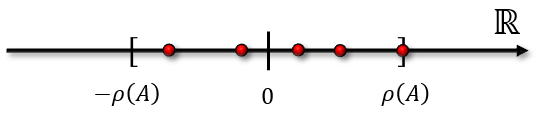  
</div>

Neka su $\lambda$ i $v$ sopstveni par simetrične matrice $A,$
$$Av=\lambda v.$$ S obzirom da je $\lambda\in\mathbb{R}$ to je i vektor $v$ sa realnim komponentama.
Množenjem sa leve strane gornje jednakosti vektorom $v^T$ dobijamo
$$v^TAv=v^T(\lambda v)=\lambda(v^Tv).$$
Odatle je 
$$\lambda=\dfrac{v^TAv}{v^Tv}.$$
Količnik $\dfrac{v^TAv}{v^Tv}$ zovemo [Rajlijev količnik](https://en.wikipedia.org/wiki/Rayleigh_quotient) (Rayleigh quotient).

**Primer 4.** Neka je $A\in\mathcal{M}_{m\times n}$ proizvoljna realna matrica. Tada je Gramova matrica $A^TA$ simetrična pa ima isključivo realne sopstvene vrednosti. Neka su $v$ i $\lambda$ sopstveni par Gramove matrice $A^TA,$ tj. važi $A^TAv=\lambda v.$ Tada je
$$\|Av\|^2=(Av)^T(Av)=v^T(A^TAv)=\lambda v^Tv=\lambda \|v\|^2\ \Longrightarrow\ \lambda=\dfrac{\|Av\|^2}{\|v\|^2}\geq0.$$
Zaključujemo da je Gramova matrica uvek sa nenegativnim sopstvenim vrednostima. Kada je $A$ punog ranga kolona, Gramova matrica $A^TA$ je regularna, pa ne može imati $0$ u svom spektru. Takva Gramova matrica je sa svim pozitivnim sopstvenim vrednostima.

***

**Lema 2.** 	Neka su $v_1$ i $v_2$ sopstveni vektori simetrične matrice $A$ koji odgovaraju različitim sopstvenim vrednostima $\lambda_1$ i $\lambda_2.$ Tada su $v_1$ i $v_2$ ortogonalni vektori. 
$$Av_1=\lambda_1v_1,\ Av_2=\lambda_2v_2,\quad \lambda_1\neq\lambda_2\quad
\stackrel{A=A^T}{\Longrightarrow}\quad 
v_1\perp v_2$$

***

**Teorema 2.** *Teorema o glavnim osama simetrične matrice: [Spectral theorem](https://en.wikipedia.org/wiki/Spectral_theorem#Hermitian_maps_and_Hermitian_matrices)*

Realna matrica $A$ je simetrična akko se može dijagonalizirati posredstvom ortogonalne matrice. Drugim rečima, postoje ortogonalna matrica $Q$ i dijagonalna matrica $D$ tako da važi
	$$A=QDQ^T.$$    

$$D=Q^TAQ$$

***

**Primer 5.** Potražićemo sopstvene vrednosti i sopstvene vektore slučajno generisane simetrične matrice. To obavlja ugrađena funkcija `linalg.eigh`.

In [31]:
n=5
A=rndm.randn(n,n)
A=A+A.T
A

array([[-2.41857793, -0.20743868, -0.01727002, -1.9003091 ,  0.9320874 ],
       [-0.20743868,  3.35118972,  2.01462426,  1.8142463 , -0.90195009],
       [-0.01727002,  2.01462426,  2.41019807, -1.52479227,  0.2237259 ],
       [-1.9003091 ,  1.8142463 , -1.52479227,  0.16940415, -0.45077582],
       [ 0.9320874 , -0.90195009,  0.2237259 , -0.45077582,  0.02850045]])

In [32]:
spec, Q=np.linalg.eigh(A)
print(spec)
print(Q)

[-3.82599271 -0.98701977 -0.14861474  3.33748809  5.16485359]
[[ 0.79291114  0.50910984  0.20600393  0.24624084  0.09501017]
 [-0.1850776   0.42124375  0.26029402 -0.17200436 -0.83124094]
 [ 0.19443105 -0.47311055 -0.17980121  0.68840787 -0.48179777]
 [ 0.51436547 -0.53660743  0.17331481 -0.61256892 -0.20543106]
 [-0.18617986 -0.22711177  0.90963888  0.24623944  0.16025151]]


In [33]:
np.round(A@Q-Q@np.diag(spec),3)

array([[ 0.,  0.,  0.,  0.,  0.],
       [-0.,  0.,  0., -0., -0.],
       [-0.,  0.,  0.,  0., -0.],
       [-0., -0., -0.,  0.,  0.],
       [ 0.,  0., -0.,  0., -0.]])

Ukoliko je potreban samo vektor sopstvenih vrednosti simetrične matrice možemo ga dobiti pozivom ugrađene funkcije `linalg.eigvalsh`.

In [34]:
spec=np.linalg.eigvalsh(A)
spec

array([-3.82599271, -0.98701977, -0.14861474,  3.33748809,  5.16485359])

***

Kolone ortogonalne matrice $Q$ iz spektralne dekmpozicije  $A=QDQ^T$ predstavljaju bazu ortonormiranih sopstvenih vektora matrice $A.$ Ove vektore nazivamo *glavne ose* matrice $A$ (principal components).   

$$A=QDQ^T
=\left[\begin{array}{c|c|c|c}
\phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}\\
q_0&q_1&\dots&q_{n-1}\\ \phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}
\end{array}\right]
\begin{bmatrix} \lambda_0&0&\dots&0\\0&\lambda_1&\dots&0\\&&\ddots&\\0&0&\dots&\lambda_{n-1}\end{bmatrix}
\begin{bmatrix} \underline{\phantom{WW}q_0^{T^{\phantom{I}}}\phantom{WW}}\\ \underline{\phantom{WW}q_1^{T^{\phantom{I}}}\phantom{WW}}\\[3pt]\underline{\phantom{WWI}\vdots\phantom{IWW}}\\
\phantom{W}q_{n-1}^{T^{\phantom{I}}}\phantom{W}\end{bmatrix}$$

$$A=\left[\begin{array}{c|c|c|c}
\phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}\\
\lambda_0q_0&\lambda_1q_1&\dots&\lambda_{n-1}q_{n-1}\\ \phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}
\end{array}\right]
\begin{bmatrix} \underline{\phantom{WW}q_0^{T^{\phantom{I}}}\phantom{WW}}\\ \underline{\phantom{WW}q_1^{T^{\phantom{I}}}\phantom{WW}}\\[3pt]\underline{\phantom{WWI}\vdots\phantom{IWW}}\\
\phantom{W}q_{n-1}^{T^{\phantom{I}}}\phantom{W}\end{bmatrix}
=\lambda_0q_0q_0^T+\lambda_1q_1q_1^T+\dots+\lambda_{n-1}q_{n-1}q_{n-1}^T$$

$Av=\lambda_1q_1q_1^Tv+\lambda_2q_2q_2^Tv+\dots+\lambda_nq_nq_n^Tv$

**Posledica 1.** 	Neka je $A\in\mathcal{M}_{n\times n}$ realna simetrična matrica čije su sopstvene vrednosti 
$${\rm Sp}(A)=\{\lambda_0,\lambda_1,\dots,\lambda_{n-1}\},$$ 
i odgovarajući ortonormirani sopstveni vektori $q_0,q_1,\dots,q_n,$ baza prostora $\mathbb{R}^n,$ tako da važi 
$$Aq_i=\lambda_iq_i.$$ Tada je
$$A=\lambda_0q_0q_0^T+\lambda_1q_1q_1^T+\dots+\lambda_{n-1}q_{n-1}q_{n-1}^T
=\lambda_0P_0+\lambda_1P_1+\dots+\lambda_{n-1}P_{n-1},$$
	gde su $P_i=q_iq_i^T$ projekcije na sopstveni potprostor $\mathcal{L}(q_i)=U_{\lambda_i}=\mathcal{N}(A-\lambda_i).$

***

Na osnovu posledice 1, za proizvoljan vektor $v\in\mathbb{R}^n$ njegova slika $Av$ predstavlja sumu ortogonalnih projekcija na glavne ose $q_k$ i istezanje ili kontrakciju odgovarajuće projekcije koeficijentom $\lambda_k.$  Takođe, slika $Av$ je
$$Av=\sum_{k=0}^{n-1}\lambda_kq_kq_k^Tv=\sum_{k=0}^{n-1}\lambda_k(q_k^Tv)q_k.$$
 te $\lambda_k(q_k^Tv)$ predstavlja koordinate vektora $Av$ u odnosu na bazu glavnih osa $q_k.$ 
 S obzirom da je skup $q_0,q_1,\dots,q_{n-1}$ ortonormirana baza, to su $\lambda_k(q_k^Tv)$ Furijeove koordinate slike $Av$ u odnosu na bazu glavnih osa $q_k.$  Tada za njih važi uopštena Pitagorina teorema:
$$ \|Av\|^2=\sum_{k=0}^{n-1}(\lambda_kq_k^Tv)^2.$$

Primetimo da su $q_k^Tv$ Furijeove koordinate vektora $v$ u odnosu na bazu glavnih osa. Dakle, koordinate slika su samo skalirane koordinate originala u bazi sopstvenih vektora.

 Kada je vektor $v$ sa jedinične sfere $(\|v\|=1)$ njegove Furijeove koordinate $q_k^Tv$ opisuju kosinus uglova sa koordinatnim osama $q_k.$ 
$$q_k\cdot v=q_k^Tv=\|q_k\|\,\|v\|\cos\angle(q_k,v)\stackrel{\|q_k\|=\|v\|=1}{=}\cos\angle(q_k,v).$$ 
Uopštena Pitagorina teorema tada dobija oblik
 $$\|v\|^2=1=\sum_{k=0}^{n-1}(q_k^Tv)^2=\sum_{k=0}^{n-1}\cos^2\angle(q_k,v),$$
kao i za sliku $Av:$
$$\|Av\|^2=\sum_{k=0}^{n-1}(\lambda_kq_k^Tv)^2
\stackrel{\|v\|=1}{=}\displaystyle\sum_{k=0}^{n-1}\lambda_k^2\cos^2\angle(q_k,v).$$
  

Uvedimo oznake 
 $$\lambda_{\min}=\min_{k}|\lambda_k|\quad\mbox{ i }\quad \lambda_{\max}=\max_{k}|\lambda_k|=\rho(A).$$
 Kada je $\lambda_{\min}>0$ zaključujemo da $0\not\in{\rm Sp}(A),$ tj. simetrična matrica $A$ je regularna. 
 Na osnovu poznavanje spektralne dekompozicije regularne simetrične matrice $A$ imamo i spektralnu dekompoziciju njene inverzne matrice:  $A^{-1}=QD^{-1}Q^T.$ Tada je 
$$\rho(A^{-1})=\max_{k}\dfrac{1}{|\lambda_k|}=\dfrac{1}{\lambda_{\min}}.$$

> $\lambda_{min}\stackrel{Teorema 1.}{\mapsto}\dfrac{1}{\lambda_{min}}$ je dominantna sopstvena vrednost matrice $A^{-1}$

> $\lambda_{max}\stackrel{Teorema 1.}{\mapsto}\dfrac{1}{\lambda_{max}}$ je najmanja po modulu sopstvena vrednost matrice $A^{-1}$

 Na osnovu  toga zaključujemo da za jedinične vektore, odnosno vektore sa jedinične sfere važi:
 \begin{align}
 \|Aq_k\|&=|\lambda_k|,\\ 	\|Av\|^2&\leq\displaystyle\sum_{k=0}^{n-1}\lambda_{\max}^2\cos^2\angle(q_k,v)
 =\lambda_{\max}^2\displaystyle\sum_{k=0}^{n-1}\cos^2\angle(q_k,v)
 \stackrel{\|v\|=1}{=}\lambda_{\max}^2=\rho(A)^2,\\ 	
 \|Av\|^2&\geq\displaystyle\sum_{k=0}^{n-1}\lambda_{\min}^2\cos^2\angle(q_k,v)
 =\lambda_{\min}^2\displaystyle\sum_{k=0}^{n-1}\cos^2\angle(q_k,v)
 \stackrel{\|v\|=1}{=}\lambda_{\min}^2\stackrel{\lambda_{\min}>0}{=}\dfrac{1}{\rho(A^{-1})^2}.
 \end{align}

Dakle, važi nejednakost za slike jedinične sfere:
$$ \lambda_{\min}\leq\|Av\|\leq\lambda_{\max},\quad \forall v\in\mathbb{R}^n,\ \|v\|=1.$$
 

Zbog toga, simetričnim linearnim preslikavanjem $v\to Av$ jedinična sfera  se slika u [elipsoid](https://en.wikipedia.org/wiki/Ellipsoid). 
 Preslikavanjem jedinične sfere vrši se njeno istezanje u elipsoid duž glavnih osa $q_k.$ 'Istezanje' je najveće duž glavne ose sa sopstvenom vrednošću $|\lambda|=\lambda_{\max}.$  Slično, 'kontrakcija' je najveća duž glavne ose sa $|\lambda|=\lambda_{\min}.$

  <div>
   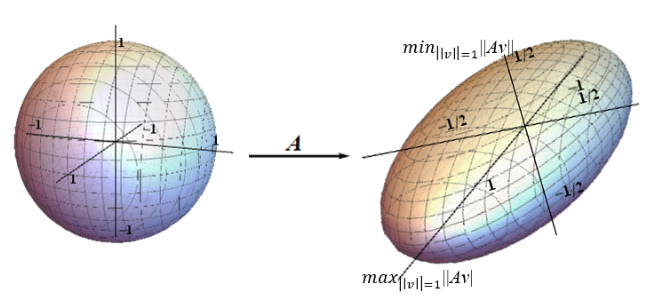  
</div>   


U slučaju singularne simetrične matrice dimenzija prostora slika umanjena je za višestrukost sopstvene vrednosti $\lambda=0,$ tj. za dimenziju jezgra. Jedinična sfera dimenzije $n$ se tada slika u elipsoid dimenzije $m<n.$

**Primer 6.** Za simetričnu matricu $A\in\mathcal{M}_{2\times2}$ proverićemo dobijene nejednakosti
$$ \lambda_{\min}\leq\|Av\|\leq\lambda_{\max},\quad \forall v\in\mathbb{R}^n,\ \|v\|=1.$$

Eksperiment ćemo sprovesti za jednu regularnu i jednu singularnu matricu.

In [35]:
A=rndm.randn(2,2)
A=A+A.T
A

array([[-2.30274495, -2.39380054],
       [-2.39380054,  2.5844809 ]])

In [36]:
spek=np.linalg.eigvalsh(A)
la_max=np.max(np.abs(spek))
la_min=np.min(np.abs(spek))

In [37]:
la_max , la_min

(3.561617187616809, 3.2798812388610417)

Među sopstvenim vrednostima nema nule. Zbog toga je slučajna matrica $A$ regularna. 

Kreiraćemo niz jediničnih sopstvenih vektora. U prostoru $\mathbb{R}^2$ to su vektori oblika $\begin{bmatrix}\cos\theta\\\sin\theta\end{bmatrix}.$

In [38]:
teta=np.linspace(0,2*np.pi,50)
jedin_kruz=np.array([np.cos(teta),np.sin(teta)])

Formiramo slike ovih jediničnih vektora. Preslikavanje je $v\mapsto Av.$

In [39]:
slike=A@jedin_kruz
norme_slika=np.linalg.norm(slike,axis=0)

Proveravamo nejednakost o opsegu džina slika.

In [40]:
np.all((la_min<=norme_slika) & (norme_slika<=la_max))

True

Možemo i grafički da proverimo sliku jedinične kružnice.

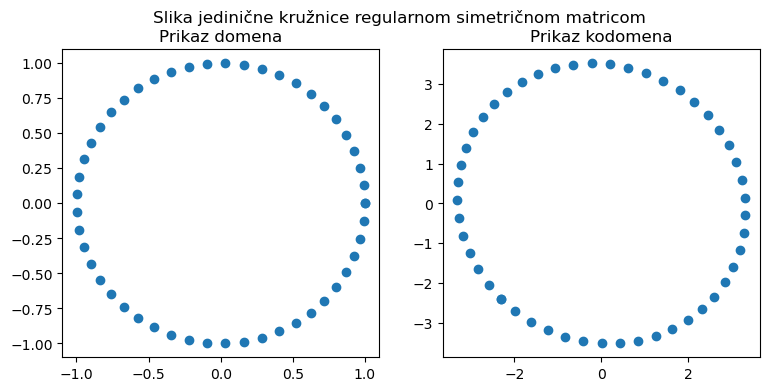

In [41]:
slika, ax = plt.subplots(1, 2,figsize=(9,4)) 
slika.suptitle('Slika jedinične kružnice regularnom simetričnom matricom')
slika.subplots_adjust(hspace=0.5)

plt.subplot(1, 2, 1)           #(broj_vrsta, broj_kolona, redni_broj_slike)  
plt.title("Prikaz domena")  
plt.plot(jedin_kruz[0],jedin_kruz[1],'o') 

plt.subplot(1, 2, 2)           #(broj_vrsta, broj_kolona, redni_broj_slike)  
plt.title("Prikaz kodomena")  
plt.plot(slike[0],slike[1],'o') ;


Ponovićemo postupak za singularnu simetričnu matricu.

In [42]:
A=np.ones((2,2))
A

array([[1., 1.],
       [1., 1.]])

In [43]:
spek=np.linalg.eigvalsh(A)
la_max=np.max(np.abs(spek))
la_min=np.min(np.abs(spek))

In [44]:
la_max , la_min

(2.0, 0.0)

In [45]:
slike=A@jedin_kruz
norme_slika=np.linalg.norm(slike,axis=0)

In [46]:
np.all((la_min<=norme_slika) & (norme_slika<=la_max))

True

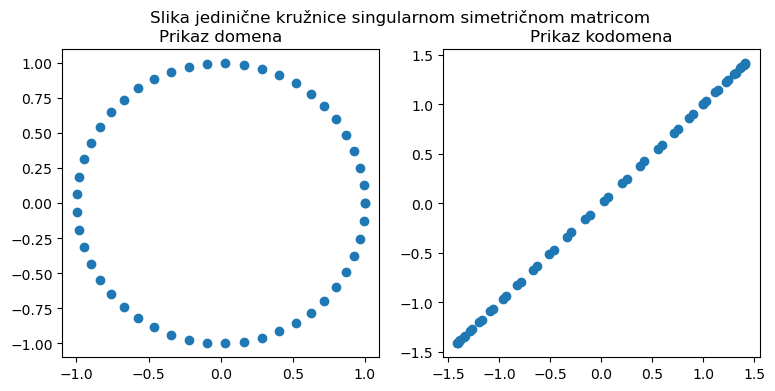

In [47]:
slika, ax = plt.subplots(1, 2,figsize=(9,4)) 
slika.suptitle('Slika jedinične kružnice singularnom simetričnom matricom')
slika.subplots_adjust(hspace=0.5)

plt.subplot(1, 2, 1)           #(broj_vrsta, broj_kolona, redni_broj_slike)  
plt.title("Prikaz domena")  
plt.plot(jedin_kruz[0],jedin_kruz[1],'o') 

plt.subplot(1, 2, 2)           #(broj_vrsta, broj_kolona, redni_broj_slike)  
plt.title("Prikaz kodomena")  
plt.plot(slike[0],slike[1],'o') ;


***

**Primer 7.** Da bismo proveru iz prethodnog primera sproveli u 3D potrebno je poznavanje izraza jediničnih vektora u ovom prostoru. Za to su najpogodnije [sferne koordinate](https://en.wikipedia.org/wiki/Spherical_coordinate_system). Parametarska jednačina centralne sfere poluprečnika $r$ glasi:
$$\left\{\begin{array}{l}
x=x(\varphi,\theta)=r\cos(\theta)\sin(\varphi),\\
y=y(\varphi,\theta)=r\sin(\theta)\sin(\varphi),\\
z=z(\varphi,\theta)=r\cos(\varphi),
\end{array}\right.\qquad \varphi\in[0,\pi],\quad \theta\in[0,2\pi],$$

In [48]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [49]:
A=rndm.randn(3,3)
A=A+A.T+8*np.eye(3)
A

array([[ 8.69973767,  0.7722276 , -2.19787564],
       [ 0.7722276 ,  7.67977969,  2.06531073],
       [-2.19787564,  2.06531073,  8.37370134]])

In [50]:
spek=np.linalg.eigvalsh(A)
la_max=np.max(np.abs(spek))
la_min=np.min(np.abs(spek))
print(la_min)
print(la_max)

4.817454692517996
11.026918154879048


In [51]:
theta = np.linspace(0, 2 * np.pi, 100)
phi = np.linspace(0, np.pi, 100)
KosTet=np.cos(theta)
SinTet=np.sin(theta)
KosFi=np.cos(phi)
SinFi=np.sin(phi)

In [52]:
x =  np.outer(KosTet, SinFi)
y =  np.outer(SinTet, SinFi)
z =  np.outer(np.ones(100), KosFi)
jed_sfera=np.array([x.reshape(10000,),y.reshape(10000,),z.reshape(10000,)])
slike=A@jed_sfera
Xs=(slike[0]).reshape(100,100)
Ys=(slike[1]).reshape(100,100)
Zs=(slike[2]).reshape(100,100)

In [53]:
norme_slika=np.linalg.norm(slike,axis=0)
np.all((la_min<=norme_slika) & (norme_slika<=la_max))

True

In [54]:
np.max(norme_slika)

11.026552962089218

In [55]:
%matplotlib notebook

<IPython.core.display.Javascript object>


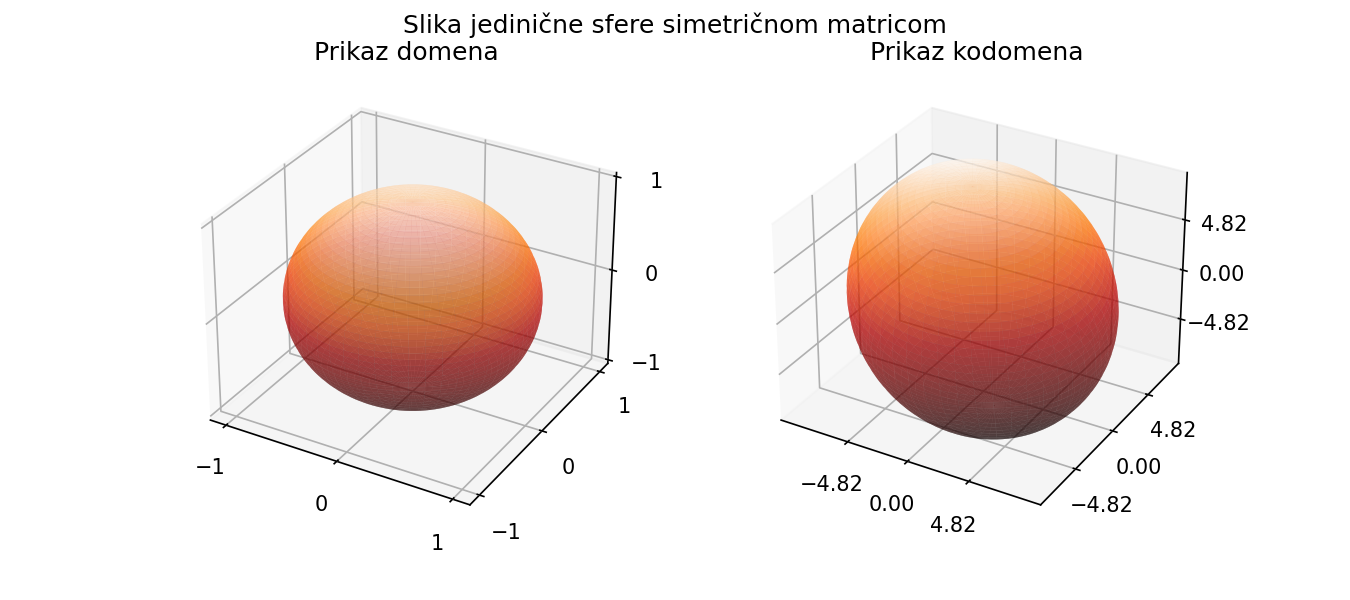

In [56]:
slika=plt.figure(figsize=(9,4)) 
slika.suptitle('Slika jedinične sfere simetričnom matricom')
slika.subplots_adjust(hspace=0.5)

ax1 = slika.add_subplot(1, 2, 1, projection='3d')
plt.title("Prikaz domena") 
ax1.set_xticks([-1, 0, 1])
ax1.set_yticks([-1, 0, 1])
ax1.set_zticks([-1, 0, 1])
ax1.plot_surface(x, y, z , cmap=cm.gist_heat, alpha=0.5);

ax2 = slika.add_subplot(1, 2, 2, projection='3d')
plt.title("Prikaz kodomena") 
ax2.set_xticks([-la_max,-la_min, 0,la_min, la_max])
ax2.set_yticks([-la_max,-la_min, 0,la_min, la_max])
ax2.set_zticks([-la_max,-la_min, 0,la_min, la_max])
ax2.plot_surface(Xs, Ys, Zs , cmap=cm.gist_heat, alpha=0.5);

plt.show()

In [57]:
%matplotlib inline

***

**Zadatak 9.** Dat je ortonormiran skup vektora $v_i,\ i = 0, 1, \dots, n-1.$ Neka je matrica $A\in\mathcal{M}_{n\times n}$ data sa $A =\displaystyle\sum_{i=0}^{n-1}\lambda_iv_iv_i^T,$ za neke skalare $\lambda_i\in\mathbb{R}.$ Dokazati da je $Av_i =\lambda_iv_i,\ i = 0, 1,\dots, n-1.$

**Rešenje :** 

Skup vektora $\{v_i\ |\ i=0,1,\dots,n-1\}$ je ortonormiran $\Longleftrightarrow\quad v_i^Tv_j=\begin{cases}0,&i\neq j\\ 1,&i=j.\end{cases}$ Tada je
$$Av_j=\left(\sum_{i=0}^{n-1}\lambda_iv_iv_i^T\right)v_j=\sum_{i=0}^{n-1}\lambda_iv_i(v_i^Tv_j)=\lambda_jv_j.$$

***

**Zadatak 10.** Naći ortogonalnu dijagonalizaciju sledećih matrica.

a) $A=\begin{bmatrix} 1&2&3&4\\ 2&1&2&3\\ 3&2&-1&-2\\4&3&-2&-1\end{bmatrix},\qquad$
b) $A=\begin{bmatrix} 0.23&0.49&1.31&-0.17\\ 0.49&1.14&-0.87&0.63\\
1.31&-0.87&1.21&0.57\\ -0.17&0.63&0.57&0.34\end{bmatrix}$

a) Spektralnu dekompoziciju dobijamo pozivom odgovarajuće ugrađene naredbe.

In [58]:
A=np.array([[1,2,3,4],[2,1,2,3],[3,2,-1,-2],[4,3,-2,-1.]])
spekA, QA=np.linalg.eigh(A)
np.round(A-(QA*spekA)@QA.T,3)

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0., -0., -0.],
       [ 0., -0.,  0.,  0.],
       [ 0., -0.,  0.,  0.]])

Sopstvene vrednosti matrice $A$ su elementi vektora `spekA`.

In [59]:
spekA

array([-6.86670764, -0.92104625,  0.92104625,  6.86670764])

Ortonormirana baza sopstvenih vektora nalazi se u kolonama matrice `QA`.

In [60]:
QA

array([[-0.46757358, -0.59940954, -0.10548908, -0.64105789],
       [-0.26490373,  0.79344828, -0.00448227, -0.54794685],
       [ 0.54794685, -0.00448227, -0.79344828, -0.26490373],
       [ 0.64105789, -0.10548908,  0.59940954, -0.46757358]])

In [61]:
np.isclose(QA@QA.T,np.eye(4))

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

b) Ponovićemo prethodni postupak za matricu $B.$

In [62]:
B=np.array([[0.23,0.49,1.31,-0.17],[0.49,1.14,-0.87,0.63],[1.31,-0.87,1.21,0.57],[-0.17,0.63,0.57,0.34]])
spekB, QB=np.linalg.eigh(B)
np.round(B-(QB*spekB)@QB.T,3)

array([[ 0.,  0.,  0., -0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [-0.,  0.,  0., -0.]])

In [63]:
spekB

array([-1.35595651,  0.38521417,  1.55559303,  2.33514931])

In [64]:
QB

array([[ 0.61701863, -0.54755156,  0.38455998, -0.41423295],
       [-0.41015929, -0.19030223,  0.80372695,  0.38675239],
       [-0.54213388,  0.11106203,  0.14436776, -0.82031337],
       [ 0.39641926,  0.80724072,  0.43045855, -0.07693911]])

In [65]:
np.isclose(QB@QB.T,np.eye(4))

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

***

## Pozitivna definitnost matrica

Upoznajemo još jednu veoma bitnu karakteristiku kvadratnih matrica. Ona je u tesnoj vezi sa simetričnim matricama.

**Definicija 3.** Neka je $A$ realna kvadratna matrica reda $n.$
- Matrica $A$ je pozitivno definitna ukoliko je  $v^TAv>0$ za svaki nenula vektor $v\in\mathbb{R}^n.$
- Matrica $A$ je pozitivno semidefinitna ukoliko je $v^TAv\geq0$ za svaki vektor $v\in\mathbb{R}^n.$
- Matrica $A$ je negativno definitna ukoliko je  $v^TAv<0$ za svaki nenula vektor $v\in\mathbb{R}^n,$ tj. ako je matrica $-A$ pozitivno definitna.
- Matrica $A$ je negativno semidefinitna ukoliko je $-A$ pozitivno semidefinitna.
- Ukoliko matrica $A$ nije niti pozitivno niti negativno semidefinitna, matrica je nedefinitna.

Primetimo da je svaka pozitivno definitna matrica istovremeno i pozitivno semidefinitna. Obrat u opštem slučaju ne važi. Negativna semidefinitnost i definitnost mogu se svesti na ispitivanje odgovarajuće pozitivne definitnosti matrice sa elementima suprotnog znaka, tj. suprotne matrice.
Zbog toga ćemo se u nastavku baviti samo pozitivnom definitnošću. Analogni rezultati se dobijaju za ostale vrste definitnosti matrica.

***

Upoznaćemo vrste matrica za koje je pozitivnu definitnost lako utvrditi.

**Primer 8.** Jedinična matrica $I$ je pozitivno definitna: za $v\neq\theta$
	$$v^TIv=v^Tv=\|v\|_2>0.$$
    
Neka je data dijagonalna matrica $D={\rm diag}(d_0,d_1,\dots,d_n)$ i proizvoljan nenula vektor $v=\begin{bmatrix} x_0&x_1&\dots&x_n\end{bmatrix}^T.$  Tada je
	$$v^TDv=d_0x_0^2+d_1x_1^2+\dots+d_nx_n^2.$$
Pretpostavimo da je neki od dijagonalnih elemenata, npr. $d_0\leq0.$
Tada za odgovarajući vektor kanonske baze $e_0=\begin{bmatrix}1&0&\dots&0\end{bmatrix}^T$ važi: 
$$e_0^TDe_0=d_0\leq0.$$ 
Zaključujemo da je dijagonalna matrica $D$ pozitivno definitna akko su svi dijagonalni elementi $d_0,d_1,\dots,d_n$ pozitivne vrednosti. Matrica $D$ je pozitivno semidefinitna ukoliko je $d_0,d_1,\dots,d_n\geq0.$ Slični zaključci mogu se dobiti za negativnu definitnost i nedefinitnost dijagonalne matrice $D.$    

***

**Primer 9.** Simetrične matrice predstavljaju još jednu vrstu matrica za koje postoji pojednostavljen kriterijum provere pozitivne definitnosti, tj. bilo kog od navedenih tipova definitnosti.

Neka je $A=QDQ^T$ spektralna dekompozicija simetrične matrice $A.$ Označimo sa $q_k$ glavne ose matrice $A.$

$$v^TAv=v^T\displaystyle\sum_{k=1}^n\lambda_kq_kq_k^Tv=\displaystyle\sum_{k=1}^n\lambda_k(q_k^Tv)v^Tq_k
=\displaystyle\sum_{k=1}^n\lambda_k(q_k^Tv)^2>0,\ \forall v\neq\theta\quad\Longleftrightarrow\quad \lambda_k>0.$$

Zaključujemo da se provera pozitivne definitnosti simetričnih matrica svodi na proveru znaka sopstvenih vrednosti te matrice. 

Na osnovu rezultata iz primera 4 vidimo da su Gramove matrice uvek bar pozitivno semidefinitne. Kada su regularne, Gramove matrice su pozitivno definitne.

***

**Teorema 3.** Simetrična matrica $A$ je pozitivno definitna  ako je ${\rm Sp}(A)>0.$

Simetrična matrica $A$ je pozitivno semidefinitna  ako je ${\rm Sp}(A)\geq0.$

Simetrična matrica $A$ je negativno definitna  ako je ${\rm Sp}(A)<0.$

Simetrična matrica $A$ je negativno semidefinitna  ako je ${\rm Sp}(A)\leq0.$

***

I koso-simetrične matrice imaju specijalno svojstvo vezano za pozitivnu definitnost. To je tema narednog primera.

**Primer 10.** Neka je $A_{KS}\in\mathcal{M}_{n\times n}$ realna koso-simetrična matrica i $v\in\mathbb{R}^n$ vektor. Tada je $v^TA_{KS}v=0.$ S obzirom da je $v^TA_{KS}v\in\mathbb{R}$ imamo da je
$$v^TA_{KS}v\stackrel{A_{KS}^T=-A_{KS}}{=}v^T(-A_{KS}^T)v=-v^TA_{KS}^Tv=-(v^TA_{KS}v)^T=-v^TA_{KS}v.$$
Dakle, za realan broj $a=v^TA_{KS}v$ važi da je $a=-a.$ Sledi da je $v^TA_{KS}v=0.$

Koso-simetrične matrice uvek daju nulu kao vrednost izraza $v^TA_{KS}v.$ 

***

**Zadatak 11.** Neka je $A$ koso-simetrična matrica. Pokazati da je tada $A^2$ simetrična negativno definitna
matrica.

**Rešenje :** 

\begin{align}
&A^T=-A\quad\Longrightarrow\quad (A^2)^T=(A^T)^2=(-A)^2=A^2\quad\Longrightarrow\quad A^2
\mbox{ je simetrična}\\
& v^TA^2v\stackrel{A=-A^T}{=}v^T(-A^TA)v=-v^TA^TAv=-(Av)^T(Av)=-\|Av\|^2<0
\quad\Longrightarrow\quad A^2 \mbox{ je negativno definitna}
\end{align}

***

Pozitivna definitnost se prenosi kroz zbir matrica. To je tema narednog primera.

**Primer 11.** Ako su $A$ i $B$ kvadratne pozitivno definitne matrice iste dimenzije, tada je i matrica $A+B$ pozitivno definitna. Zaista,
$$v^T(A+B)v=v^TAv+v^TBv>0,\quad v\neq\theta.$$

***

Prenošenje pozitivne definitnosti kroz sume matrica je povod da se pozitivna definitnost proizvoljne kvadratne matrice razmatra kroz simetrične matrice.

Neka je $A$ proizvoljna realna kvadratna matrica reda $n.$  Označimo $A_S=\dfrac{A+A^T}2$ simetrični deo matrice $A$ i $A_{KS}=\dfrac{A-A^T}2$ koso-simetrični deo matrice $A.$ Podsetimo se, za ove matrice važi:  $A=A_S+A_{KS}.$ Kako je $v^TA_{KS}v=0$, to je za svaku realnu matricu $A\in\mathcal{M}_{n\times n}$
tačna jednakost
$$v^TAv=v^TA_Sv.$$
Zaista,
$$v^TAv=v^T(A_S+A_{KS})v=v^TA_Sv+v^TA_{KS}v=v^TA_Sv.$$

Zbog ove jednakosti, u nastavku kada budemo govorili o definitnosti matrica podrazumevaćemo da je analizirana matrica simetrična.

Upoznajemo još neke načine ispitivanja pozitivne definitnosti simetričnih matrica.

**Definicija 4.** Neka su $A,B\in\mathcal{M}_{n\times n}$ simetrične matrice. Za $A$ i $B$ kažemo da su kongruentne matrice ako postoji regularna matrica $T\in\mathcal{M}_{n\times n}$ tako da je $A=TBT^T.$

**Teorema 4.** [*Zakon inercije Silvestera*](https://en.wikipedia.org/wiki/Sylvester%27s_law_of_inertia):

Dve simetrične matrice $A$ i $B$ su kongruentne akko imaju jednak broj pozitivnih sopstvenih vrednosti, jednak broj nula sopstvenih vrednosti, kao i jednak broj negativnih sopstvenih vrednosti.

**Posledica 2.** Simetrične matrice su iste definitnosti akko su kongruentne.

**Teorema 5.** Za realnu simetričnu  matricu $A\in\mathcal{M}_{n\times n},$ sledeća tvrđenja su ekvivalentna.

a) $v^TAv>0$ za sve nenula vektore $v\in\mathbb{R}^n.$

b) Sve sopstvene vrednosti  matrice $A$ su  pozitivne, tj. ${\rm Sp}(A)>0.$

v) Matrica $A$ je kongruentna sa jediničnom matricom $I\in\mathcal{M}_{n\times n}.$

g) 	$A = U^TU$ za neku regularnu matricu $U.$

d) $A$ se može predstaviti kao Gramova matrica linearno nezavisnog skupa vektora 
$$\{u_1, \dots, u_n\}\subset\mathbb{R}^m,\qquad A=\begin{bmatrix} u_1\cdot u_1&u_1\cdot u_2&\dots&u_1\cdot u_n\\
			u_2\cdot u_1&u_2\cdot u_2&\dots&u_2\cdot u_n\\
		\vdots	&\vdots& &\vdots\\ u_n\cdot u_1&u_n\cdot u_2&\dots&u_n\cdot u_n\end{bmatrix}.$$

**Posledica 3.** Pozitivno definitna matrica je regularna matrica. Tada je i njoj inverzna matrica takođe pozitivno definitna.

**Primer 12.** Ispitaćemo definitnost trodijagonalne
	matrice $A=\begin{bmatrix} 3&-1&0\\ -1&3&-1\\ 0&-1&3\end{bmatrix}$ na više različitih načina koji su omogućeni teoremom 5.

In [66]:
A=np.array([[3,-1,0],[-1,3,-1],[0,-1,3]])

Potražićemo prvo najmanju vrednost izraza $v^TAv$ za vektore sa jedinične sfere.

In [67]:
theta = np.linspace(0, 2 * np.pi, 100)
phi = np.linspace(0, np.pi, 100)
KosTet=np.cos(theta)
SinTet=np.sin(theta)
KosFi=np.cos(phi)
SinFi=np.sin(phi)
x =  np.outer(KosTet, SinFi)
y =  np.outer(SinTet, SinFi)
z =  np.outer(np.ones(100), KosFi)
jed_sfera=np.array([x.reshape(10000,),y.reshape(10000,),z.reshape(10000,)])
vAv=np.diag(jed_sfera.T@(A@jed_sfera))

In [68]:
np.min(vAv)

1.5858059181765134

Izračunavanjem spektra potvrđujemo da je matrica $A$ pozitivno definitna.

In [69]:
np.linalg.eigvalsh(A)

array([1.58578644, 3.        , 4.41421356])

Ugrađena funkcija SciPy biblioteke koja pronalazi dijagonalnu matricu kongruentnu simetričnoj matrici $A$ je `scipy.linalg.ldl`. Izlaz ove funkcije su donje trougaona matrica $L$ za koju je $P^TAP=LDL^T$ i dijagonalna matrica $D$ kongurentna matrici $A.$ Treća komponenta izlaza je oznaka istovremene permutacije vrsta i kolona matrice $A$ potrebna za dobijanje prve dve matrice u naznačenom formatu.  

In [70]:
spl.ldl(A)

(array([[ 1.        ,  0.        ,  0.        ],
        [-0.33333333,  1.        ,  0.        ],
        [ 0.        , -0.375     ,  1.        ]]),
 array([[3.        , 0.        , 0.        ],
        [0.        , 2.66666667, 0.        ],
        [0.        , 0.        , 2.625     ]]),
 array([0, 1, 2], dtype=int64))

Ugrađena funkcija SciPy biblioteke koja pronalazi skup vektora takav da je simetrična matrica $A$ njihova Gramova matrica je `scipy.linalg.cholesky`. Izlaz ove funkcije je gornje trougaona matrica $R$  za koju je $A=R^TR.$

In [71]:
spl.cholesky(A)

array([[ 1.73205081, -0.57735027,  0.        ],
       [ 0.        ,  1.63299316, -0.61237244],
       [ 0.        ,  0.        ,  1.62018517]])

***

## Uopšteni skalarni proizvod

Uopšteni realan skalarni proizvod je funkcija nad vektorima koja ima osobine:
- S1: $\langle u,v\rangle=\langle v,u\rangle;$
- S2: $\langle \alpha u,v\rangle=\alpha\langle u,v\rangle;$
- S3: $\langle u+v,w\rangle=\langle u,w\rangle+\langle v,w\rangle;$
- S4: $\langle u,u\rangle>0, u\neq\theta.$

Posledica aksioma skalarnog proizvoda jeste da je realan skalarni proizvod bilinearno preslikavanje. Drugim rečima, ovo preslikavanje je linearno i po levom i po desnom vektoru:
\begin{align}
\langle\alpha u+\beta v,w\rangle&=\langle\alpha u,w\rangle+\langle\beta v,w\rangle
=\alpha\langle u,w\rangle+\beta\langle v,w\rangle,\\[4pt]
\langle  u,\alpha v+\beta w\rangle&=\langle \alpha v+\beta w,u\rangle
=\alpha \langle  v,u\rangle+\beta\langle  w,u\rangle=\alpha\langle  u, v\rangle+\beta\langle  u,w\rangle.
\end{align} 

Izborom baze u konačno dimenzionalnom vektorskom prostoru možem da dobijemo matricu ovog bilinearnog preslikavanja. To su matrice sa veoma posebnim svojstvima. Napomenimo da nije svako bilinearno preslikavanje skalarni proizvod. Možemo da ih identifikujemo upravo na osnovu svojstava pridruženih matrica.

**Primer 13.** Neka je $(b)\ :\ \{b_0,b_1,\dots,b_{n-1}\}$ izabrana baza u unitarnom prostoru $V,$ i $S=[s_{ij}]\in\mathcal{M}_{n\times n}$ matrica skalarnog proizvoda, tj. Gramova matrica vektora baze $(b)$ u odnosu na skalarni proizvod $\langle \cdot,\cdot\rangle:$
$$s_{ij}=\langle b_i,b_j\rangle.$$
Matrice skalarnog proizvoda  vektora baze su specijalan slučaj Gramove matrice.

Neka su $v,u\in V$ dati svojim koordinatama u odnosu na bazu $(b),$
$$v=\begin{bmatrix} x_0&x_1&\dots&x_{n-1}\end{bmatrix}_{(b)}^T,\qquad 
u=\begin{bmatrix} y_0&y_1&\dots&y_{n-1}\end{bmatrix}_{(b)}^T.$$

Primetimo da su koordinate vektora bilo koje baze u odnosu na nju samu:
\begin{align}
    b_0&=\begin{bmatrix}1&0&0&\dots&0\end{bmatrix}_{(b)}^T,\\
    b_1&=\begin{bmatrix}0&1&0&\dots&0\end{bmatrix}_{(b)}^T,\\
    &\vdots\\
    b_{n-1}&=\begin{bmatrix}0&0&0&\dots&1\end{bmatrix}_{(b)}^T,
\end{align}

Tada je 
\begin{align}
    \langle v,u\rangle&=\left\langle \displaystyle\sum_{i\in(n)}x_ib_i,\displaystyle\sum_{j\in(n)}y_jb_j\right\rangle
    =\displaystyle\sum_{i\in(n)}\displaystyle\sum_{j\in(n)}x_iy_j\langle b_i,b_j \rangle
    =\displaystyle\sum_{i\in(n)}\displaystyle\sum_{j\in(n)}x_iy_js_{ij}\\    &=\displaystyle\sum_{i\in(n)}x_i\big(s_{i0}y_0+s_{i1}y_1+\dots+s_{i\,n-1}y_{n-1}\big)\\
&=\begin{bmatrix} x_0&x_1&\dots&x_{n-1}\end{bmatrix}
\begin{bmatrix} s_{00}&s_{01}&\dots&s_{0\,n-1}\\
s_{10}&s_{11}&\dots&s_{1\,n-1}\\
\vdots&\vdots&&\vdots\\
s_{n-1\,0}&s_{n-1\,1}&\dots&s_{n-1\,n-1}
\end{bmatrix}
\begin{bmatrix} y_0\\y_1\\\vdots\\y_{n-1}\end{bmatrix}.
\end{align} 

Vidimo da je izračunavanje skalarnog proizvoda vektora datih koordinatama u nekoj bazi dovoljno poznavanje skalarnih proizvoda vektora te baze, tj. Gramove matrice vektora baze.

Realan skalarni proizvod je komutativna operacija, pa je specijalno $$s_{ij}=\langle b_i,b_j\rangle=\langle b_j,b_i\rangle=s_{ji}.$$ Zbog toga za matricu $S$ važi  $S^T=S,$ tj.  matrica skalarnog proizvoda $S$ je simetrična matrica.

Osobina S4 skalarnog proizvoda donosi još jednu veoma bitnu osobinu matrice skalarnog proizvoda:
 $$\forall v\neq\theta,\quad 
 v^TSv>0.$$
Matrica $S$ je pozitivno definitna.

Na osnovu sprovedene analize vidimo da je bilinearna funkcionela skalarni proizvod ukoliko je njena matrica simetrična pozitivno definitna. Osobina simetričnosti se lako prepoznaje. Za pozitivnu definitnost upoznali smo kriterijume provere.

***

Neka je $A\in\mathcal{M}_{n\times n}$ simetrična  pozitivno definitna matrica. Tada izraz 
$$ \langle v,u\rangle_A=v^TAu,$$
    predstavlja uopšten realan skalarni proizvod  vektora iz $\mathbb{R}^n.$

Po ugledu na standardni skalarni proizvod, uopšteni skalarni proizvod  indukuje normu i ortogonalnost. Za naredne zadartke, primere, definicije i tvrđenja podrazumevaćemo da je $A\in\mathcal{M}_{n\times n}$ simetrična pozitivno definitna matrica.

**Definicija 5.** $A-$norma vektora $v\in\mathbb{R}^n$ indukovana je $A-$skalarnim proizvodom, tj.
$$\|v\|_A=\sqrt{(v,v)_A}.$$
Vektor $v\in\mathbb{R}^n$ je $A-$normiran ukoliko je $v^TAv=1.$ 

**Zadatak 12.** Izračunati rastojanje vektora $u=\begin{bmatrix}1\\2\\-1\end{bmatrix}$ i $v=\begin{bmatrix}1\\1\\0\end{bmatrix}$ koristeći normu indukovnu 

a) standardnim skalarnim proizvodom $u^Tv$

b) skalarnim proizvodom $u^TAv,\quad A=\begin{bmatrix}2&1&0\\1&3&-1\\0&-1&2\end{bmatrix}.$

**Rešenje :**

Za svaku normu indukovanu skalarnim proizvodom koristimo formulu za rastojanje
$$d(u,v)=\sqrt{\langle u-v,u-v\rangle}.$$

In [72]:
u=np.array([1,2,-1])
v=np.array([1,1,0])
A=np.array([[2,1,0],[1,3,-1],[0,-1,2]])

a) Euklidovo rastojanje:

In [73]:
d=np.linalg.norm(v-u)
d

1.4142135623730951

b) $A-$norma

In [74]:
dA=np.sqrt(np.dot(u-v,A@(u-v)))
dA

2.6457513110645907

***

**Zadatak 13.** Izračunati ugao između vektora $u=\begin{bmatrix}1\\2\end{bmatrix}$ i $v=\begin{bmatrix}-1\\1\end{bmatrix}$ koristeći za izračunavanje $\cos\angle(u,v)=\dfrac{\langle u,v\rangle}{\|u\|\,\|v\|},\quad \|u\|=\sqrt{\langle u,u\rangle},$ gde je 

a) standardni skalarni proizvod $\langle u,v\rangle=u^Tv,$

b) skalarni proizvod $\langle u,v\rangle=u^TAv,\quad A=\begin{bmatrix}2&1\\1&3\end{bmatrix}.$

**Rešenje:**



In [75]:
u=np.array([1,2])
v=np.array([-1,1])
A=np.array([[2,1],[1,3]])

a) Ugao u odnosu na standardni skalarni proizvod:

In [76]:
kos_uv=np.dot(u,v)/(np.linalg.norm(u)*np.linalg.norm(v))
kos_uv

0.31622776601683794

b) Ugao u odnosu na $A-$skalarni proizvod:

In [77]:
v1=A@v
u1=A@u
kosA_uv=np.dot(u,v1)/(np.sqrt(np.dot(u,u1)*np.dot(v,v1)))
kosA_uv

0.408248290463863

***

**Definicija 6.**  Za dva vektora $u,v\in\mathbb{R}^n$ kažemo da su konjugovani u odnosu na $A$ ($A-$konjugovani ili $A-$ortogonalni) ukoliko je $$u^TAv{=}v^TAu=0.$$  	

***

Kada su $v$ i $u$ konjugovani, na osnovu osobine S2 skalarnog proizvoda sledi da su konjugovani i vektori $\alpha v$ i $\beta u$ za proizvoljne skalare $\alpha,\beta\in\mathbb{R}.$ Zbog  toga često govorimo o konjugovanim pravcima $\mathcal{L}(v)$ i $\mathcal{L}(u).$
	

Kao i u slučaju standardnog skalarnog proizvoda, $A-$ortogonalnost skupa nenula vektora $\{v_0,v_1,\dots,v_k\}$ znači njihovu linearnu nezavisnost.
$$v_i^TA\cdot\Big| \ \alpha_0v_0+\alpha_1v_1+\dots+\alpha_kv_k=\theta\ \stackrel{v_i^TAv_j=0,\ i\neq j}{\Longrightarrow} \ 
	\alpha_i(v_i,v_i)_A=0\ \stackrel{v_i\neq\theta}{\Longrightarrow}\ \alpha_i=0,\ i=0,1,\dots,k.$$
Dakle, $A-$konjugovanost skupa vektora možemo smatrati strožim uslovom od linearne nezavisnosti.	

Uopšteni skalarni proizvod omogućava i Gram-Šmitov postupak $A-$ortonormiranja.  Od skupa linearno nezavisnih vektora $\{v_0,v_1,\dots,v_k\}$ možemo kreirati skup $A-$konjugovanih i $A-$normiranih vektora ($A-$orotonormiranih).
\begin{align}
	    u_0&=v_0,\qquad q_0=\dfrac{u_0}{\sqrt{u_0^TAu_0}}=\dfrac{u_0}{\|u_0\|_A}, \quad 
	    \|q_0\|_A=1,\\
	    u_1&=v_1-\lambda_0 q_0,\quad u_1^TAq_0=\langle q_0,u_1\rangle_A=0\\
	    &\Longrightarrow\ \lambda_0=\dfrac{\langle q_0,v_1\rangle_A}{\langle q_0,q_0\rangle_A}
        =\langle q_0,v_1\rangle_A,\\
	    u_1&=v_1-\langle q_0,v_1\rangle_A q_0,\qquad q_1=\dfrac{u_1}{\|u_1\|_A},\\   
	    &\vdots\\
	    u_k&=v_k-\lambda_0q_0-\dots-\lambda_{k-1}q_{k-1},
	    \quad u_k^TAq_i=\langle q_i,u_k\rangle_A=0,\quad  i=0,1,\dots,k-1,\\
	    &\Longrightarrow\ \lambda_i=\dfrac{\langle q_i,v_k\rangle_A}{\langle q_i,q_i\rangle_A}
        =\langle q_i,v_k\rangle_A,\quad i=0,1,\dots,k-1,\\
	    u_k&=v_k-\langle q_0,v_k\rangle_Aq_0-\dots-\langle q_{k-1},v_k\rangle_Aq_{k-1},
	    \qquad q_k=\dfrac{u_k}{\|u_k\|_A}\,.
\end{align}

Samim tim i matrica $A-$projekcije na jednodimenzionalni potprostor $\mathcal{L}(v),\ v\in\mathbb{R}$ izračunava se sa 
$$P=\dfrac{vv^TA}{v^TAv}\,.$$ 

**Primer 14.** 
	Neka je $q_0,q_1,\dots,q_{n-1}$ baza $A-$ortonormiranih vektora prostora $\mathbb{R}^n,$ tj. važi
$$\langle q_i,q_j\rangle_A=q_i^TAq_j=\begin{cases}
	0, &i\neq j,\\
	1, &i=j.
	\end{cases}$$
Za vektor $v=\alpha_0q_0+\alpha_1q_1+\dots+\alpha_{n-1}q_{n-1}$ njegova $A-$norma jednaka je
\begin{align}
	\|v\|_A^2&=v^TAv=(\alpha_0q_0+\alpha_1q_1+\dots+\alpha_{n-1}q_{n-1})^TA
    (\alpha_0q_0+\alpha_1q_1+\dots+\alpha_{n-1}q_{n-1})\\
	&=\displaystyle\sum_{i,j=0}^{n-1}\alpha_i\alpha_j(q_i^TAq_j)
    =\displaystyle\sum_{i=0}^{n-1}\alpha_i\alpha_i(q_i^TAq_i)\\
	&=\alpha_0^2+\alpha_1^2+\dots+\alpha_{n-1}^2.
	\end{align}
Drugim rečima, koordinate vektora u odnosu na $A-$ortonormiranu bazu predstavljaju $A-$Furijeove koordinate. Zbog toga očekujemo da  $A-$orotonormirana baza podržava još neke osobine minimalnosti koje smo upoznali kod Furijeovih koordinata.

***

 Jedna od primena uvedenih pojmova nalazi se u postupcima rešavanja sistema linearnih jednačina čija je matrica sistema realna, simetrična i pozitivno definitna.

**Primer 15.** 
	Neka je $A$ simetrična pozitivno definitna matrica i $v$ (jedinstveno) rešenje sistema linearnih jednačina $Ax=b,$ tj. $v=A^{-1}b.$ Tada je $x=v\ $ 'tačka' minimuma izraza po promenljivoj $x:$
\begin{align}
	\|(x-v)\|_A^2&=(x-v)^TA(x-v)\\
	&=x^TAx-x^TAv-v^TAx+v^TAv\\
	&{=}x^TAx-2x^TAv+v^TAv.
\end{align}
S obzirom da poslednji član $v^TAv$ ne zavisi od $x,$ zaključujemo da je vektor $v=A^{-1}b$ jedinstven vektor koji minimizira funkciju
$$f(x)=x^TAx-2x^TAv=x^TAx-2x^Tb=x^TAx-2b^Tx.$$

Neka je $q_0,q_1,\dots q_{n-1},$ $A-$ortonormirana baza vektora u $\mathbb{R}^n,$ tj. važi da je
$$\langle q_i,q_j\rangle_A=q_i^TAq_j=\begin{cases}
	0,&i\neq j,\\1,&i=j.
	\end{cases}$$
Predstavimo vektor $x$ koordinatama u ovoj bazi,
$$x=\alpha_0q_0+\alpha_1q_1+\dots+\alpha_{n-1}q_{n-1}.$$
Izraz funkcije $f(x)$ tada postaje:
\begin{align}
	    f(x)&=(\alpha_0q_0+\alpha_1q_1+\dots+\alpha_{n-1}q_{n-1})^TA
        (\alpha_0q_0+\alpha_1q_1+\dots+\alpha_{n-1}q_{n-1})-2b^T(\alpha_0q_0+\alpha_1q_1+\dots+\alpha_{n-1}q_{n-1})\\
	    &=\displaystyle\sum_{i,j=0}^{n-1}\alpha_i\alpha_jq_i^TAq_j-2\displaystyle\sum_{i=0}^{n-1}\alpha_ib^Tq_i
	    =\displaystyle\sum_{i=0}^{n-1}\alpha_i^2-2\displaystyle\sum_{i=0}^{n-1}\alpha_ib^Tq_i\\
	    &=\displaystyle\sum_{i=0}^{n-1}\alpha_i(\alpha_i-2b^Tq_i).
\end{align}

Svaki od pojedinačnih sabiraka $\alpha_i(\alpha_i-2b^Tq_i),$ u poslednjem izrazu, zavisi isključivo od jedne koordinate $\alpha_i.$ Zbog toga će izraz za $f(x)$ biti minimalan kada je svaki od sabiraka $\alpha_i(\alpha_i-2b^Tq_i)$ minimalan. Iz realne analize poznato je da se minimum kvadratne funkcije $t(t-2a)$ dobija u temenu, tj. za $t=a.$
$$p(t)=t(t-2a)=t^2-2at\ \Longrightarrow\ p'(t)=2t-2a=0\ \Longrightarrow\ t_{\min}=a.$$
Zbog toga koordinate vektora $x$ koji minimizira funkciju $f$ glase $\alpha_i=b^Tq_i,$ pa je traženo rešenje minimizacionog problema i sistema jednačina $Ax=b$ dato sa
$$v=\displaystyle\sum_{i=0}^{n-1}(b^Tq_i)q_i.$$

Eksplicitni oblik rešenja pogodan je i za njegovo približno izračunavanje. Naime ukoliko su koeficijenti $b^Tq_i$ dovoljno bliski nuli počevši od nekog $i\geq m,$ tada nije potrebno računati baš celu sumu, niti baš kompletnu bazu $A-$konjugovanih vektora $q_i.$ 
Dovoljno dobra aproksimacija rešenja može da bude i izraz
$$v=\displaystyle\sum_{i=0}^{n-1}(b^Tq_i)q_i\approx\displaystyle\sum_{i=0}^m(b^Tq_i)q_i.$$
To je ideja iza narednog iterativnog algoritma.

***

## Metod konjugovanih gradijenata

Prethodnim razmatranjem zaključili smo da postupak dobijanja tačnog rešenja sistema linearnih jednačina
$$Ax=b,\quad A\mbox{ je simetrična pozitivno definitna matrica},$$
možemo da prevedemo u iterativni postupak. Njime bi se iz iteracije u iteraciju računali elementi $A-$konjugovane baze $q_k$ i ažurirala aproksimacija $x_k$ rešenja $v.$ 
Po završetku iteracija se dobija približno rešenje sistema jednačina $x_m\approx v,$ ili ukoliko se sprovede svih $n$ iteracija, dobilo bi se tačno (tačnije) rešenje. Kvalitet aproksimacije rešenja $x_k,\ k=0,1,2,\dots$ u svakoj od iteracija prati se kroz rezidualni vektor 
$r_k=b-Ax_k.$ 

Ukoliko su u prethodnim iteracijama određeni konjugovani pravci $v_0,v_1,\dots,v_k,$ (nisu $A-$normirani) u narednom koraku novi konjugovani pravac određuje se na osnovu rezidualnog vektora $r_k.$ Iz njega se izdvaja nova $A-$konjugovana komponenta na sve prethodne pravce. 
\begin{align}
v_{k+1}&=r_k-\displaystyle\sum_{i=0}^k\dfrac{v_i^TAr_k}{v_i^TAv_i}v_i,\\
x_{k+1}&=x_k+\lambda_k v_{k+1}\,.
\end{align}

Izraz za koeficijent $\lambda_k$ dobijamo iz uslova minimizacije vrednosti funkcije $g(t)=f(x+t\, q_{k+1})$ po $t\in\mathbb{R}.$ Funkcija $f$ je $f(x)=x^TAx-2b^Tx$ i $v_{k+1}=\|v_{k+1}\|_Aq_{k+1}.$ Tada je 
\begin{align}
g(t)&=f(x+t\,q_{k+1})=(x+t\,q_{k+1})^TA(x+t\,q_{k+1})-2b^T(x+t\,q_{k+1})\\
&=x^TAx-2b^Tx+2t\,q_{k+1}^TAx+t^2 q_{k+1}^TAq_{k+1}-2t\,b^Tq_{k+1}\\
&=f(x)+t^2+2t\big(q_{k+1}^TAx-q_{k+1}^Tb\big)=f(x)+t^2-2tq_{k+1}^T\big(b-Ax\big).\\
g'(t)&=2t-2q_{k+1}^T\big(b-Ax\big)=0\quad\Longrightarrow\quad t=q_{k+1}^T\big(b-Ax\big)
\end{align}
Zamenom u izraz za ažuriranje dobijamo:
\begin{align}
x_{k+1}&=x_k+\lambda_k v_{k+1}=x_k+tq_{k+1}=x_k+\dfrac{v_{k+1}^T}{\|v_{k+1}\|_A}\big(b-Ax_k\big)\dfrac{v_{k+1}}{\|v_{k+1}\|_A}\\
&=x_k+\dfrac{v_{k+1}^T\big(b-Ax_k\big)}{\|v_{k+1}\|_A^2}v_{k+1}.
\end{align}
Tada je $\lambda_k=\dfrac{v_{k+1}^Tr_{k}}{v_{k+1}^TAv_{k+1}}.$ Na osnovu rezultata čija teorijska osnova prevazilazi teme ovog kursa, izraz u brojiocu može da se zameni drugim skalarnim proizvodom,
$$\lambda_k=\dfrac{r_{k}^Tr_{k}}{v_{k+1}^TAv_{k+1}}.$$

Zbog opisanih koraka ovaj iterativni algoritam predstavlja varijantu Gram-Šmitovog postupka $A$-ortogonalizacije i nosi ime [metod konjugovanih gradijenata](https://en.wikipedia.org/wiki/Conjugate_gradient_method). Primenjuje se za matrice velikih dimenzija koje su retko posednute. Pseudo kod dat je u nastavku, a implementacija u narednom primeru:
- ulaz: $x_0,A,B,\varepsilon$
- $m,n$ su dimenzije matrice $A$
- $r_0=b-Ax_0$
- $v_0=r_0$
- $k=0$
- dok je $(k\leq n-1)$ i $v_k\neq\theta$ i $\|r_k\|>\varepsilon$ radi:
    - $t_k=\dfrac{r_k^Tr_k}{v_k^TAv_k}$
    - $x_{k+1}=x_k+t_kv_k$
    - $r_{k+1}=r_k-t_kAv_k$
    - Ako je $\|r_{k+1}\|>\varepsilon$ radi:
        - $s_k=\dfrac{r_{k+1}^Tr_{k+1}}{r_{k}^Tr_{k}}$
        - $v_{k+1}=r_{k+1}+s_kv_k$
    - $k++$
- izlaz $x_{k},\ r_k$

**Primer 16.** Kreiraćemo Python kod za rešavanje sistema linearnih jednačina $Ax=b$ upotrebom metoda konjugovanih gradijenata. Početna aproksimacija rešenja je vektor $x_0=\theta,$ za toleranciju greške je uzeta granica $\varepsilon=1e-10.$
$$\begin{bmatrix}10&1&2&3&4\\1&9&-1&2&-3\\2&-1&7&3&-5\\3&2&3&12&-1\\4&-3&-5&-1&15\end{bmatrix}
\begin{bmatrix}x\\y\\z\\t\\s\end{bmatrix}=\begin{bmatrix}12\\-27\\14\\-17\\12\end{bmatrix}.$$

In [78]:
A=np.array([[10,1.,2,3,4],[1,9,-1,2,-3],[2,-1,7,3,-5],[3,2,3,12,-1],[4,-3,-5,-1,15]])
b=np.array([12,-27,14,-17,12])
n,_=A.shape

x=np.zeros(n)

eps=1e-10
r=b-A@x

nr2=np.inner(r,r)  #kvadrat norme

v=np.copy(r)
k=0     #brojač iteracija

while (k<n) and not(np.array_equal(v,0)) and (nr2>eps):
    Av=A@v
    t=nr2/np.inner(v,Av)
    x=x+t*v
    r=r-t*Av
    c=nr2
    nr2=np.inner(r,r)
    if nr2>eps:
        s=nr2/c
        v=r+s*v
    k+=1
    
print(x)    
print(r)

[ 1. -2.  3. -2.  1.]
[ 4.44089210e-16 -5.86336535e-16  5.55111512e-16 -2.22044605e-16
 -2.22044605e-16]


In [79]:
np.round(A@x-b,2)

array([-0., -0.,  0.,  0.,  0.])

Ponovićemo postupke rešavanja na matrici veike dimenzije i meriti vremena izvršenja.

In [80]:
L=np.tril(rndm.randn(300,300))
A=L@L.T+5*np.eye(300,300)
resenje=rndm.uniform(-1,1,(300,))
b=A@resenje
n=300

In [81]:
start = timer()
x=np.zeros(n)

eps=1e-10
r=b-A@x

nr2=np.inner(r,r)  #kvadrat norme

v=np.copy(r)
k=0  #brojač iteracija

while (k<n) and not(np.array_equal(v,0)) and (nr2>eps):
    Av=A@v
    t=nr2/np.inner(v,Av)
    x=x+t*v
    r=r-t*Av
    c=nr2
    nr2=np.inner(r,r)
    if nr2>eps:
        s=nr2/c
        v=r+s*v
    k+=1
end = timer()
print("Vreme izracunavanja: ",end - start,"sec")

Vreme izracunavanja:  0.005893399997148663 sec


In [82]:
k

101

Uporedićemo vreme izvršenja algoritma sa nekim drugim poznatim procesima rešavanja sistema jednačina. 
$$A=R^TR\quad\Longrightarrow\quad Ax=(R^TR)x=b\quad\Longleftrightarrow\quad R^T(Rx)=b$$
$$\Longrightarrow\quad Rx=(R^{-1})^Tb\quad\Longrightarrow\quad x=R^{-1}(R^{-1})^Tb.$$

In [83]:
start = timer()
U = spl.cholesky(A)
y=spl.solve_triangular(U.T,b,lower=True)
xchol=spl.solve_triangular(U,y)
end = timer()
print("Vreme izracunavanja: ",end - start,"sec")

Vreme izracunavanja:  0.002365900028962642 sec


Drugi postupak je Gausova eliminacija.

In [84]:
start = timer()
lu, piv = spl.lu_factor(A)
xlu=spl.lu_solve((lu, piv), b)
end = timer()
print("Vreme izracunavanja: ",end - start,"sec")

Vreme izracunavanja:  0.0027216000016778708 sec


In [85]:
np.all(np.isclose(x,xchol))

True

In [86]:
np.all(np.isclose(x,xlu))

True

***